In [134]:
# in this notebook, we load two cluster assignments, create dictionaries using the shared examples only based on their keys, and measure their similarities.

In [46]:
# let's load a few important packages for checking the cluster similarities
import numpy as np
import pandas as pd
import os
import sys
import json
from collections import Counter
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples

In [47]:
# let's load the target/ground-truth cluster assignments. it's in `root_id_type_dict.pkl` file.
import pickle
root_id_type_dict = pickle.load(open('root_id_type_dict.pkl', 'rb'))

In [48]:
cluster_assignment_dict

{720575940629970489: 692,
 720575940631267655: 183,
 720575940605876866: 517,
 720575940606514878: 389,
 720575940627737365: 184,
 720575940628914436: 72,
 720575940633587552: 519,
 720575940626452879: 215,
 720575940616871878: 369,
 720575940621203973: 564,
 720575940619895125: 130,
 720575940618561403: 617,
 720575940659399809: 512,
 720575940604569824: 299,
 720575940613583001: 438,
 720575940623353013: 257,
 720575940645989655: 270,
 720575940612937073: 558,
 720575940619615552: 728,
 720575940613174963: 451,
 720575940651461622: 8,
 720575940612290019: 170,
 720575940634042012: 242,
 720575940623989577: 208,
 720575940630005147: 66,
 720575940624606758: 186,
 720575940647154564: 611,
 720575940622462173: 16,
 720575940625002936: 714,
 720575940632028216: 344,
 720575940623122125: 154,
 720575940623817223: 160,
 720575940612464867: 297,
 720575940627572349: 377,
 720575940623069001: 633,
 720575940628970748: 130,
 720575940611430513: 495,
 720575940613540350: 300,
 7205759406067451

In [ ]:
# let's load the estimated cluster assignments from `cluster_assignment_dict.npy`
# cluster_assignment_dict = np.load('pca_cluster_assignment_dict.npy', allow_pickle=True).item()
cluster_assignment_dict = np.load('cluster_assignment_dict.npy', allow_pickle=True).item()

In [92]:
# first, let's create a dictionary of the keys of `root_id_type_dict` mapped to integer indices.
root_id_type_dict_keys = list(root_id_type_dict.keys())
root_id_type_dict_keys_dict = {root_id_type_dict_keys[i]: i for i in range(len(root_id_type_dict_keys))}

In [93]:
shared_root_ids = list(set(root_id_type_dict.keys()).intersection(set(cluster_assignment_dict.keys())))

In [94]:
len(shared_root_ids)

46479

In [95]:
# create a cluster assignment array using the keys of `root_id_type_dict`.
# to do so, first, we should convert string-based values of `root_id_type_dict` into integer-based values.
root_id_type_dict_cluster_strings = list(set(root_id_type_dict.values()))
root_id_type_dict_values_int = dict([(cluster_string, cid) 
                                     for cid, cluster_string 
                                     in enumerate(root_id_type_dict_cluster_strings)])
print(f'there are {len(root_id_type_dict_values_int)} unique cluster assignments in the ground-truth data.')

# create a cluster assignment array using the keys of `root_id_type_dict`.
# since we use python3, we assume `dict` preserves the order of the items.
ground_truth_assignment = np.array([root_id_type_dict_values_int[root_id_type_dict[key]] 
                                         for key in shared_root_ids])
print(f'the shape of the ground-truth cluster assignment is {ground_truth_assignment.shape}.')

there are 729 unique cluster assignments in the ground-truth data.
the shape of the ground-truth cluster assignment is (46479,).


In [96]:
# now we do it for `cluster_assignment_dict`.
# first, we should convert values of `cluster_assignment_dict` into integer-based values.
cluster_assignment_dict_cluster_strings = list(set(cluster_assignment_dict.values()))
cluster_assignment_dict_values_int = dict([(cluster_string, cid) 
                                           for cid, cluster_string 
                                           in enumerate(cluster_assignment_dict_cluster_strings)])
print(f'there are {len(cluster_assignment_dict_values_int)} unique cluster assignments in the estimated data.')

# create a cluster assignment array using the keys of `cluster_assignment_dict`.
target_assignment = np.array([cluster_assignment_dict_values_int[cluster_assignment_dict[key]]
                              for key in shared_root_ids])
print(f'the shape of the target cluster assignment is {target_assignment.shape}.')


there are 729 unique cluster assignments in the estimated data.
the shape of the target cluster assignment is (46479,).


In [97]:
len(target_assignment), len(ground_truth_assignment)

(46479, 46479)

In [98]:
# let's create a randomly assigned cluster assignment array.
random_assignment = np.random.randint(0, len(np.unique(ground_truth_assignment)), len(target_assignment))

In [99]:
print(random_assignment.shape)

(46479,)


In [100]:
# now, let's measure the similarity between the two cluster assignments; `ground_truth_assignment` and `target_assignment`.

# we use the following metrics:
# 1. adjusted_rand_score
# 2. normalized_mutual_info_score
# 3. adjusted_mutual_info_score

# 1. adjusted_rand_score
adjusted_rand_score_value = adjusted_rand_score(ground_truth_assignment, target_assignment)
print(f'adjusted_rand_score: {adjusted_rand_score_value}')

# 2. normalized_mutual_info_score
normalized_mutual_info_score_value = normalized_mutual_info_score(ground_truth_assignment, target_assignment)
print(f'normalized_mutual_info_score: {normalized_mutual_info_score_value}')

# 3. adjusted_mutual_info_score
adjusted_mutual_info_score_value = adjusted_mutual_info_score(ground_truth_assignment, target_assignment)
print(f'adjusted_mutual_info_score: {adjusted_mutual_info_score_value}')

adjusted_rand_score: 0.02898837606592504
normalized_mutual_info_score: 0.24575779986572205
adjusted_mutual_info_score: 0.10937438901046194


In [101]:
np.unique(ground_truth_assignment).shape, np.unique(target_assignment).shape

((729,), (712,))

In [69]:
# now, let's measure the similarity between the two cluster assignments; `ground_truth_assignment` and `target_assignment`.

# we use the following metrics:
# 1. adjusted_rand_score
# 2. normalized_mutual_info_score
# 3. adjusted_mutual_info_score

# 1. adjusted_rand_score
adjusted_rand_score_value = adjusted_rand_score(ground_truth_assignment, random_assignment)
print(f'adjusted_rand_score: {adjusted_rand_score_value}')

# 2. normalized_mutual_info_score
normalized_mutual_info_score_value = normalized_mutual_info_score(ground_truth_assignment, random_assignment)
print(f'normalized_mutual_info_score: {normalized_mutual_info_score_value}')

# 3. adjusted_mutual_info_score
adjusted_mutual_info_score_value = adjusted_mutual_info_score(ground_truth_assignment, random_assignment)
print(f'adjusted_mutual_info_score: {adjusted_mutual_info_score_value}')

adjusted_rand_score: -1.161198863116096e-05
normalized_mutual_info_score: 0.20141032297417033
adjusted_mutual_info_score: -0.00026399183899449653


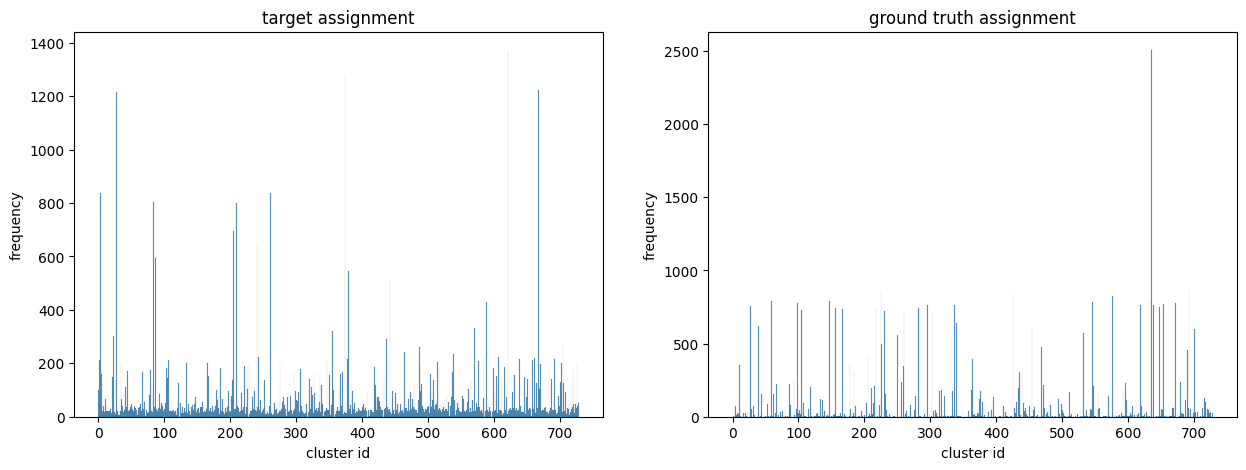

In [45]:
# draw a histogram of `target_assignment` and `ground_truth_assignment` to see the distribution of the clusters.
import matplotlib.pyplot as plt
import seaborn as sns

# draw a histogram of `target_assignment`
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(target_assignment, bins=len(set(target_assignment)))
plt.xlabel('cluster id')
plt.ylabel('frequency')
plt.title('target assignment')

# draw a histogram of `ground_truth_assignment`
plt.subplot(1, 2, 2)
sns.histplot(ground_truth_assignment, bins=len(set(ground_truth_assignment)))
plt.xlabel('cluster id')
plt.ylabel('frequency')
plt.title('ground truth assignment')

plt.show()

